In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
df=pd.read_csv('D:/kaggle/competitions/ieee-fraud-detection/train_transaction.csv')


In [124]:
df.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN   NaN  
2  NaN   NaN   NaN   NaN  
3  NaN   NaN   NaN   NaN  
4  0.0   0.0   0.0   0.0  

[5 rows x 394 columns]

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


Categorical Features - Transaction


ProductCD


card1 - card6


addr1, addr2


P_emaildomain


R_emaildomain


M1 - M9

In [126]:
list(df.columns)

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V

In [127]:
##lets remove data in which more than 60% of data is missing.
cols=['dist2','D6','D7','D8','D9','D12','D13','D14','M5','M7','M8','M9'
     ,'V138',
 'V139',
 'V140',
 'V141',
 'V142',
 'V143',
 'V144',
 'V145',
 'V146',
 'V147',
 'V148',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',
 'V161',
 'V162',
 'V163',
 'V164',
 'V165',
 'V166',
 'V167',
 'V168',
 'V169',
 'V170',
 'V171',
 'V172',
 'V173',
 'V174',
 'V175',
 'V176',
 'V177',
 'V178',
 'V179',
 'V180',
 'V181',
 'V182',
 'V183',
 'V184',
 'V185',
 'V186',
 'V187',
 'V188',
 'V189',
 'V190',
 'V191',
 'V192',
 'V193',
 'V194',
 'V195',
 'V196',
 'V197',
 'V198',
 'V199',
 'V200',
 'V201',
 'V202',
 'V203',
 'V204',
 'V205',
 'V206',
 'V207',
 'V208',
 'V209',
 'V210',
 'V211',
 'V212',
 'V213',
 'V214',
 'V215',
 'V216',
 'V217',
 'V218',
 'V219',
 'V220',
 'V221',
 'V222',
 'V223',
 'V224',
 'V225',
 'V226',
 'V227',
 'V228',
 'V229',
 'V230',
 'V231',
 'V232',
 'V233',
 'V234',
 'V235',
 'V236',
 'V237',
 'V238',
 'V239',
 'V240',
 'V241',
 'V242',
 'V243',
 'V244',
 'V245',
 'V246',
 'V247',
 'V248',
 'V249',
 'V250',
 'V251',
 'V252',
 'V253',
 'V254',
 'V255',
 'V256',
 'V257',
 'V258',
 'V259',
 'V260',
 'V261',
 'V262',
 'V263',
 'V264',
 'V265',
 'V266',
 'V267',
 'V268',
 'V269',
 'V270',
 'V271',
 'V272',
 'V273',
 'V274',
 'V275',
 'V276',
 'V277',
 'V278','V322',
 'V323',
 'V324',
 'V325',
 'V326',
 'V327',
 'V328',
 'V329',
 'V330',
 'V331',
 'V332',
 'V333',
 'V334',
 'V335',
 'V336',
 'V337',
 'V338',
 'V339']

In [128]:
df.drop(cols,axis=1,inplace=True)

# transactiondt is timedelta from a given reference datetime (not an actual timestamp) so we can't take the months or weeks.Lets just keep it as days

“TransactionDT first value is 86400, which corresponds to the number of seconds in a day (60 * 60 * 24 = 86400) so I think the unit is seconds. Using this, we know the data spans 6 months, as the maximum value is 15811131, which would correspond to day 183.” Given in the competition by
#Lynn@Vesta

In [129]:
df['TransactionDT']=df['TransactionDT'].apply(lambda x: int(x/(86400)))

In [130]:
df['TransactionDT']

0           1
1           1
2           1
3           1
4           1
         ... 
590535    182
590536    182
590537    182
590538    182
590539    182
Name: TransactionDT, Length: 590540, dtype: int64

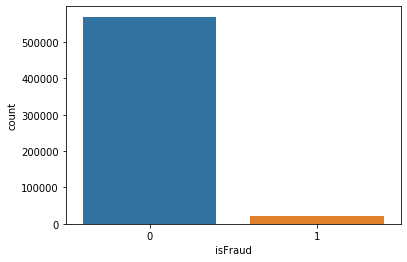

In [131]:
sn.countplot(df['isFraud'])

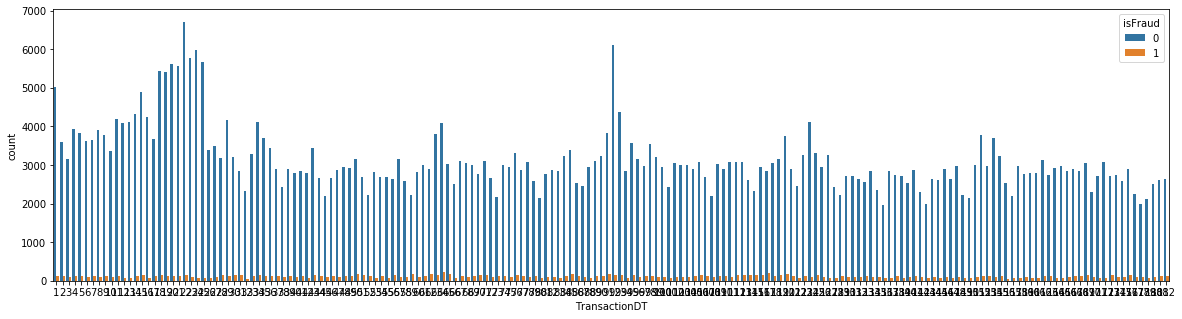

In [132]:
plt.figure(figsize=(20,5))
sn.countplot(df['TransactionDT'],hue=df['isFraud'])

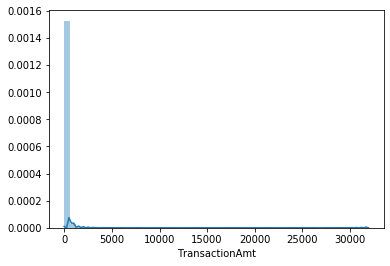

In [133]:
sn.distplot(df['TransactionAmt'])

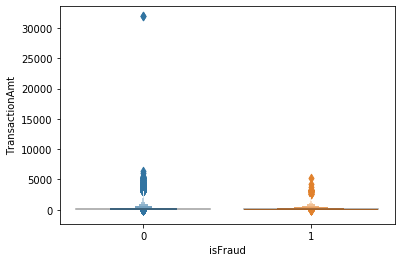

In [134]:
sn.boxenplot(df['isFraud'],df['TransactionAmt'])

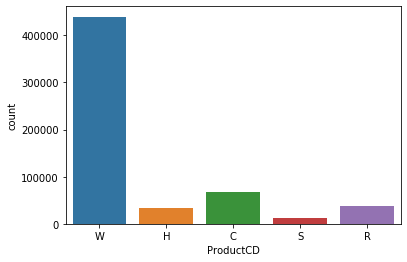

In [135]:
sn.countplot(df['ProductCD'])

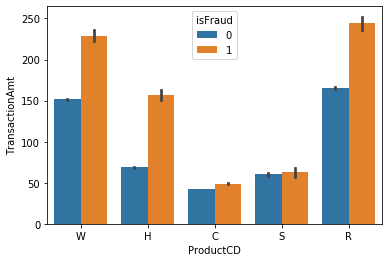

In [136]:
sn.barplot(df['ProductCD'],df['TransactionAmt'],hue=df['isFraud'])

In [137]:
cols=['card1','card2','card3','card4','card5','card6']
for col in cols:
    print(f"for {col} has {df[col].nunique()} unique values")

for card1 has 13553 unique values
for card2 has 500 unique values
for card3 has 114 unique values
for card4 has 4 unique values
for card5 has 119 unique values
for card6 has 4 unique values


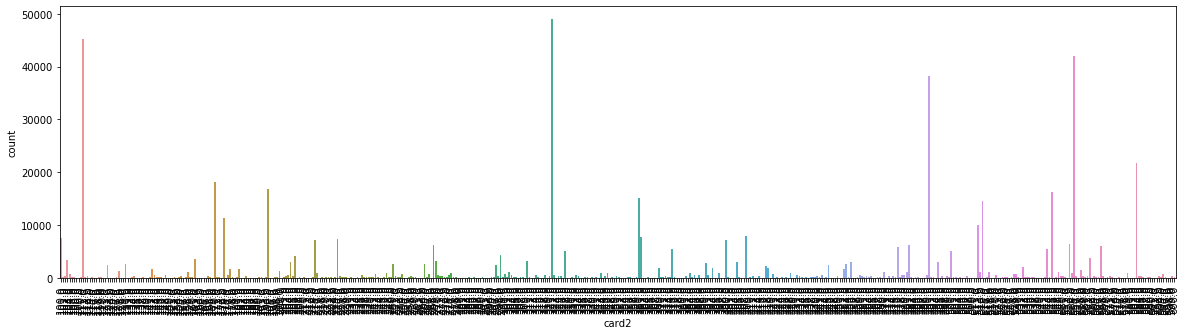

In [138]:
plt.figure(figsize=(20,5))
sn.countplot(df['card2'])
plt.xticks(rotation=90)
plt.show()
    

In [139]:
data=pd.DataFrame(df['card2'].value_counts())
data[data['card2']>10000]

card2
321.0  48935
111.0  45191
555.0  41995
490.0  38145
583.0  21803
170.0  18214
194.0  16938
545.0  16355
360.0  15190
514.0  14541
174.0  11310
512.0  10126

In [140]:
df['card2'].fillna(value=321.0,inplace=True)

In [141]:
df['card2']=df['card2'].apply(lambda x: str(x)+'card2' if x in [321.0
                                                                 ,111.0
                                                                 ,555.0
                                                                 ,490.0
                                                                 ,583.0
                                                                 ,170.0
                                                                 ,194.0
                                                                 ,545.0
                                                                 ,360.0
                                                                 ,514.0
                                                                 ,174.0
                                                                 ,512.0] else 'others_card2')

In [142]:
df['card2']

0           321.0card2
1         others_card2
2           490.0card2
3         others_card2
4           514.0card2
              ...     
590535      321.0card2
590536    others_card2
590537    others_card2
590538    others_card2
590539      170.0card2
Name: card2, Length: 590540, dtype: object

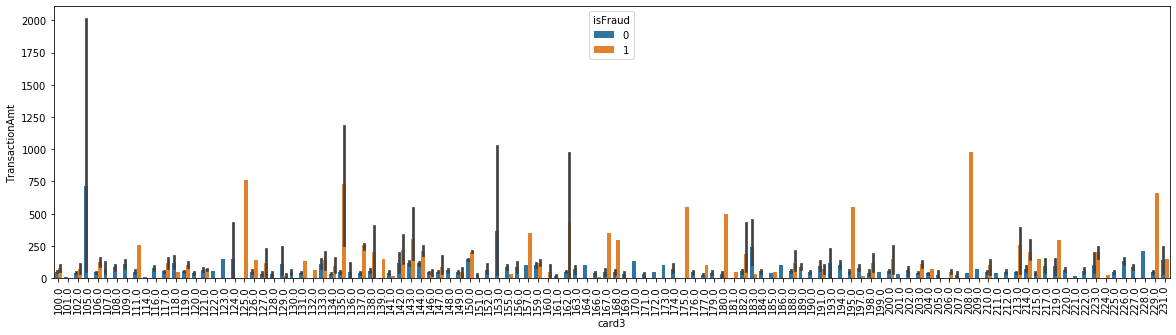

In [143]:
plt.figure(figsize=(20,5))
sn.barplot(df['card3'],df['TransactionAmt'],hue=df['isFraud'])
plt.xticks(rotation=90)
plt.show()
    

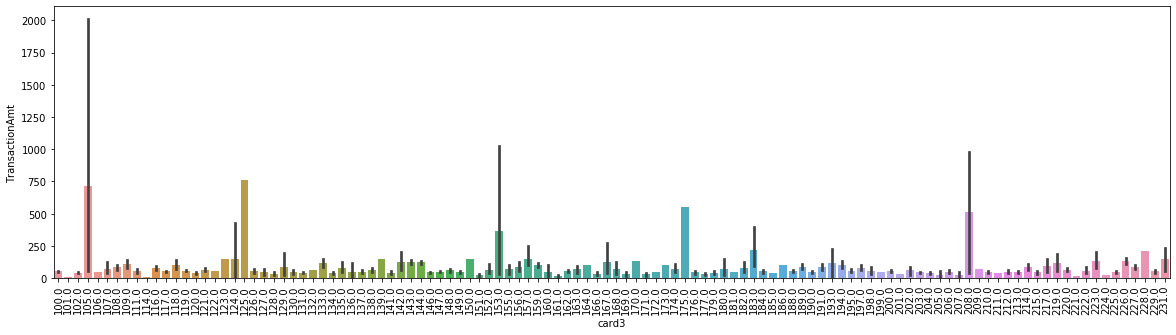

In [144]:
plt.figure(figsize=(20,5))
sn.barplot(df['card3'],df['TransactionAmt'])
plt.xticks(rotation=90)
plt.show()

In [145]:
df['card3'].fillna(value=105.0,inplace=True)

In [146]:
df['card3']=df['card3'].apply(lambda x: str(x)+'card3')

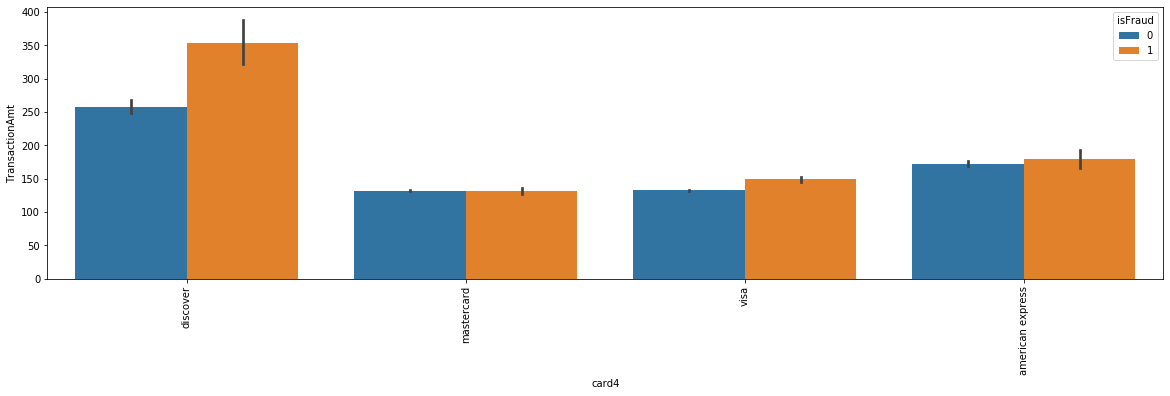

In [147]:
plt.figure(figsize=(20,5))
sn.barplot(df['card4'],df['TransactionAmt'],hue=df['isFraud'])
plt.xticks(rotation=90)
plt.show()
    

In [148]:
df['card4'].fillna(value='discover',inplace=True)

In [149]:
df['card4']=df['card4'].apply(lambda x: x+'card4')

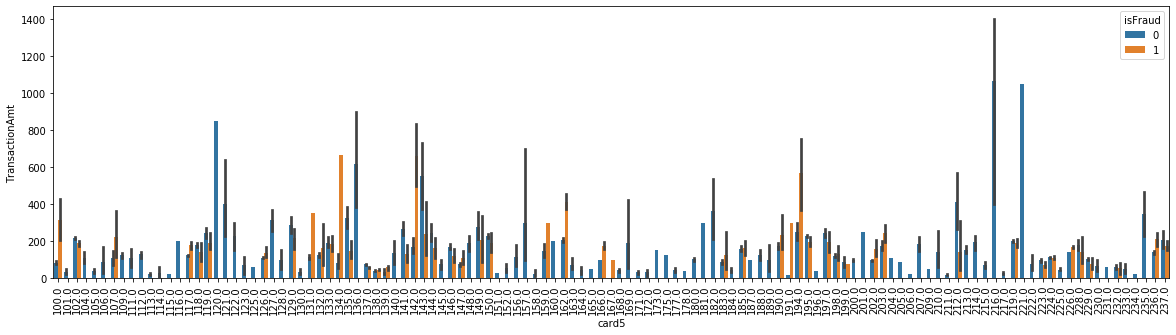

In [150]:
plt.figure(figsize=(20,5))
sn.barplot(df['card5'],df['TransactionAmt'],hue=df['isFraud'])
plt.xticks(rotation=90)
plt.show()
    

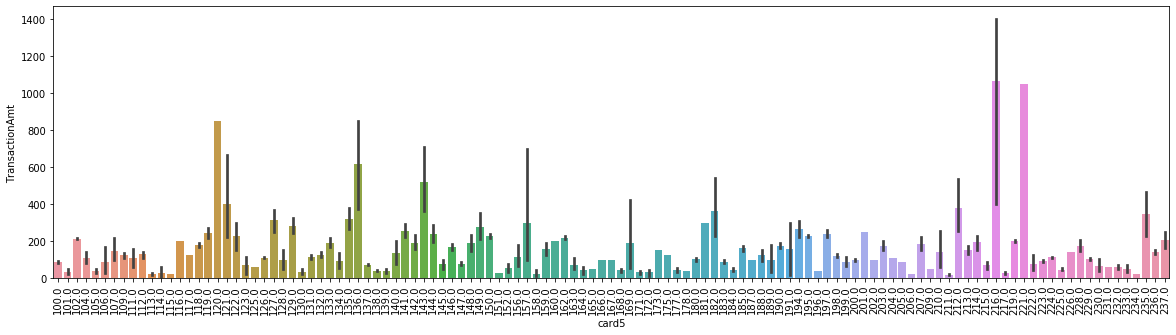

In [151]:
plt.figure(figsize=(20,5))
sn.barplot(df['card5'],df['TransactionAmt'])
plt.xticks(rotation=90)
plt.show()

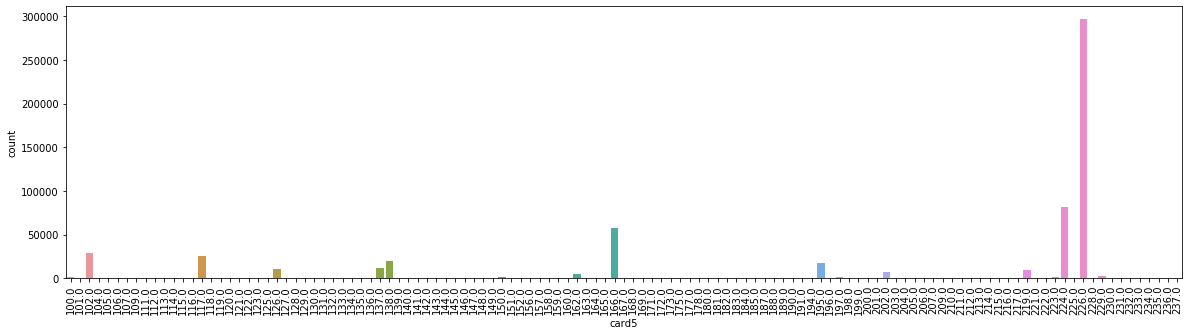

In [152]:
plt.figure(figsize=(20,5))
sn.countplot(df['card5'])
plt.xticks(rotation=90)
plt.show()

In [153]:
df['card5'].fillna(value=226.0,inplace=True)

In [154]:
data=df[df['TransactionAmt']>400]
data['card5'].unique()

array([226., 224., 195., 102., 166., 219., 150., 202., 117., 162., 126.,
       197., 141., 203., 137., 223., 190., 146., 144., 135., 119., 194.,
       133., 118., 127., 131., 182., 228., 132., 236., 212., 213., 100.,
       237., 138., 207., 129., 198., 157., 121., 147., 136., 120., 185.,
       159., 111., 149., 142., 221., 189., 134., 143., 229., 216., 183.,
       222., 107., 169., 235.])

In [155]:
df['card5']=df['card5'].apply(lambda x: str(x)+'card5' if x in [226., 224., 195., 102., 166., 219., 150., 202., 117., 162., 126.,
       197., 141., 203., 137., 223., 190., 146., 144., 135., 119., 194.,
       133., 118., 127., 131., 182., 228., 132., 236., 212., 213., 100.,
       237., 138., 207., 129., 198., 157., 121., 147., 136., 120., 185.,
       159., 111., 149., 142., 221., 189., 134., 143., 229., 216., 183.,
       222., 107., 169., 235.] else 'others_card5')

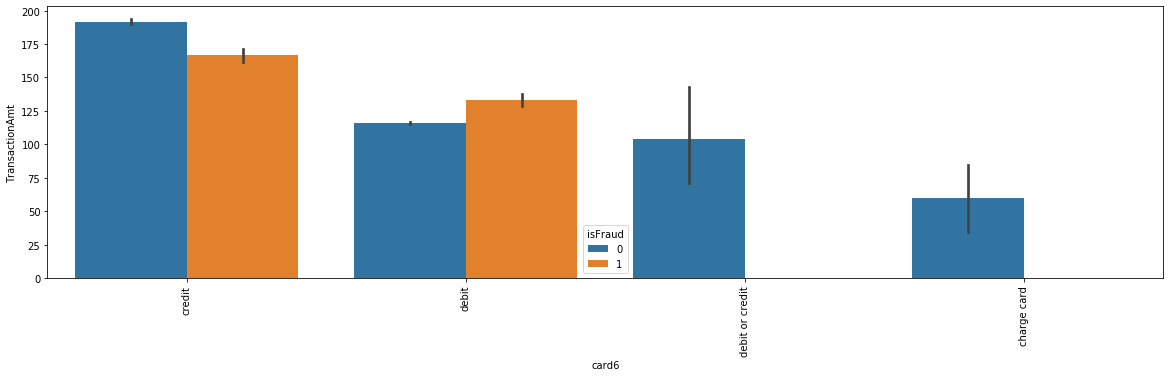

In [156]:
plt.figure(figsize=(20,5))
sn.barplot(df['card6'],df['TransactionAmt'],hue=df['isFraud'])
plt.xticks(rotation=90)
plt.show()
    

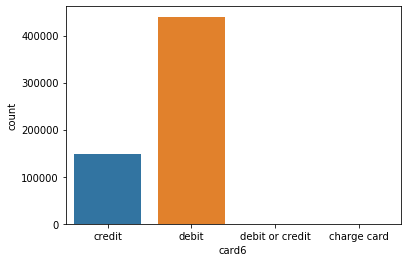

In [157]:
sn.countplot(df['card6'])

In [158]:
df['card6'].fillna(value='debit',inplace=True)

In [213]:
df['card6']=df['card6'].apply(lambda x: x+'card6')

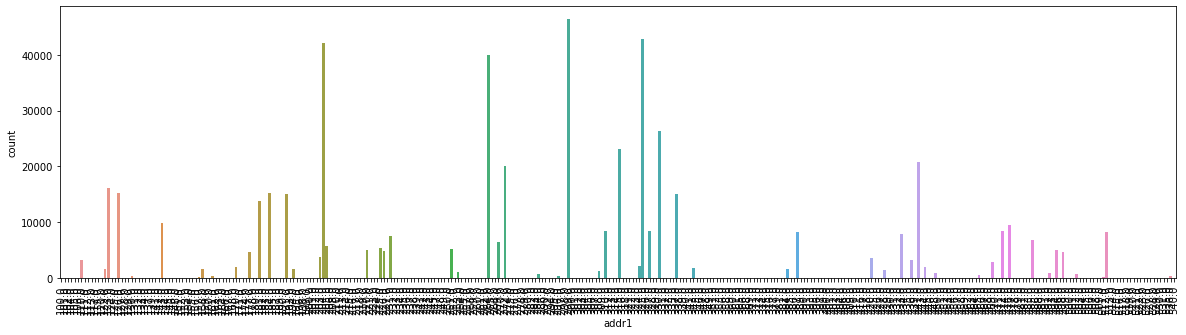

In [159]:
plt.figure(figsize=(20,5))
sn.countplot(df['addr1'])
plt.xticks(rotation=90)
plt.show()

In [160]:
df['addr1'].value_counts()

299.0    46335
325.0    42751
204.0    42020
264.0    39870
330.0    26287
         ...  
462.0        1
128.0        1
481.0        1
120.0        1
340.0        1
Name: addr1, Length: 332, dtype: int64

In [161]:
df['addr1'].fillna(value=299.0,inplace=True)

In [162]:
data=pd.DataFrame(df['addr1'].value_counts())
data[data['addr1']>10000]

addr1
299.0  112041
325.0   42751
204.0   42020
264.0   39870
330.0   26287
315.0   23078
441.0   20827
272.0   20141
123.0   16105
126.0   15243
184.0   15160
337.0   15149
191.0   14979
181.0   13856

In [163]:
df['addr1']=df['addr1'].apply(lambda x: str(x)+'regions' if x in [299.0
                                                                  ,325.0
                                                                  ,204.0
                                                                  ,264.0
                                                                  ,330.0
                                                                  ,315.0
                                                                  ,441.0
                                                                  ,272.0
                                                                  ,123.0
                                                                  ,126.0
                                                                  ,184.0
                                                                  ,337.0
                                                                  ,191.0
                                                                  ,181.0] else 'other_regions')

In [164]:
df['addr2'].value_counts()

87.0    520481
60.0      3084
96.0       638
32.0        91
65.0        82
         ...  
55.0         1
79.0         1
49.0         1
50.0         1
70.0         1
Name: addr2, Length: 74, dtype: int64

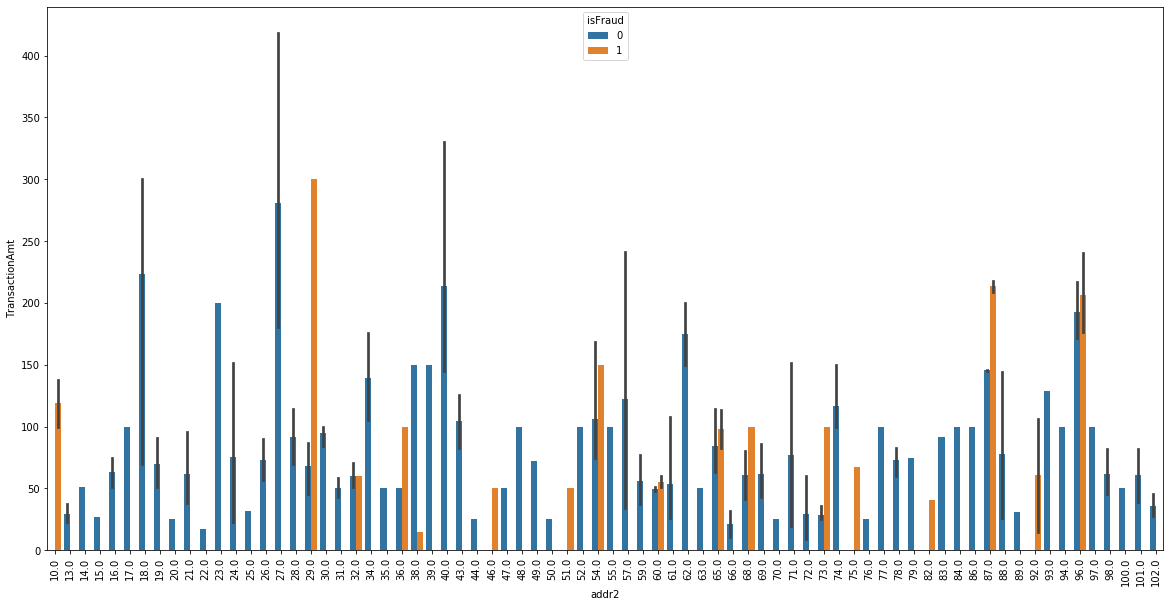

In [165]:
#countries 
plt.figure(figsize=(20,10))
sn.barplot(df['addr2'],df['TransactionAmt'],hue=df['isFraud'])
plt.xticks(rotation=90)
plt.show()

In [166]:
df['addr2'].fillna(value=87.0,inplace=True)

In [167]:
df[df['TransactionAmt']>50]['addr2'].nunique()

56

In [168]:
df['addr2'].nunique()

74

In [169]:
df[df['TransactionAmt']>50]['addr2'].unique()

array([ 87.,  96.,  65.,  32.,  60.,  24.,  16.,  59.,  31.,  26.,  69.,
       101.,  71.,  19.,  88.,  17.,  30., 102.,  21.,  14.,  49.,  78.,
        83.,  98.,  75.,  86.,  48.,  29.,  23.,  62.,  54.,  57.,  72.,
        52.,  39.,  10.,  68.,  73.,  97.,  27.,  28.,  34.,  38.,  74.,
        77.,  43.,  79.,  84.,  92.,  40.,  18.,  36.,  61.,  94.,  55.,
        93.])

In [170]:
df['addr2']=df['addr2'].apply(lambda x: str(x)+'country' if x in [ 87.,  96.,  65.,  32.,  60.,  24.,  16.,  59.,  31.,  26.,  69.,
       101.,  71.,  19.,  88.,  17.,  30., 102.,  21.,  14.,  49.,  78.,
        83.,  98.,  75.,  86.,  48.,  29.,  23.,  62.,  54.,  57.,  72.,
        52.,  39.,  10.,  68.,  73.,  97.,  27.,  28.,  34.,  38.,  74.,
        77.,  43.,  79.,  84.,  92.,  40.,  18.,  36.,  61.,  94.,  55.,
        93.] else 'other_countries')

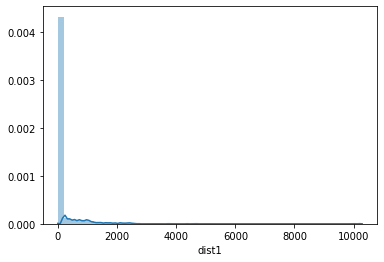

In [171]:
sn.distplot(df['dist1'])

In [172]:
df['dist1'].fillna(value=-1,inplace=True)

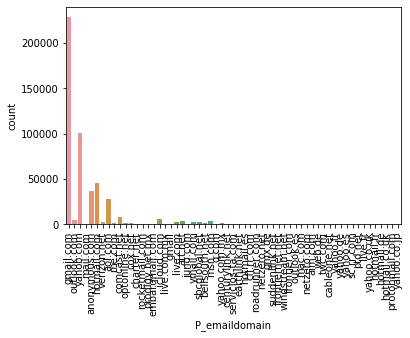

In [173]:
sn.countplot(df['P_emaildomain'])
plt.xticks(rotation=90)
plt.show()

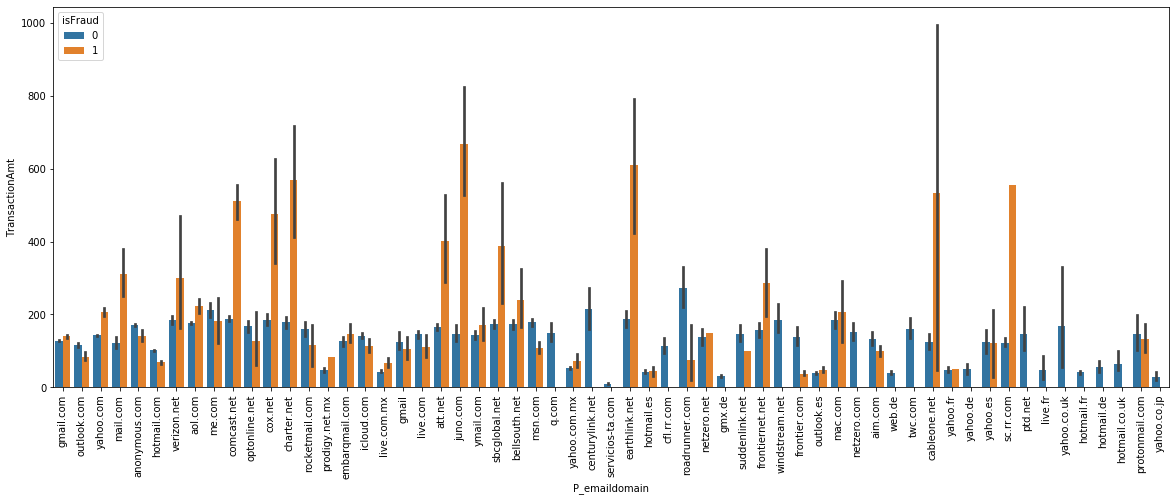

In [174]:
plt.figure(figsize=(20,7))
sn.barplot(df['P_emaildomain'],df['TransactionAmt'],hue=df['isFraud'])
plt.xticks(rotation=90)
plt.show()

In [175]:
df['P_emaildomain'].fillna(value='not_found_p_mail',inplace=True)

In [176]:
df['P_emaildomain']=df['P_emaildomain'].apply(lambda x:x+'p_mail')

In [177]:
##having 76% of data has missing
df.drop('R_emaildomain',axis=1,inplace=True)

In [178]:
list(df.columns)

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'P_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D10',
 'D11',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M6',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',

In [179]:
cat_cols=['TransactionID',
 'isFraud',
 'TransactionDT',
  'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2','P_emaildomain','M1',
 'M2',
 'M3',
 'M4',
 'M6']

In [180]:
data=df.drop(cat_cols,axis=1).copy()
matrix=data.corr()

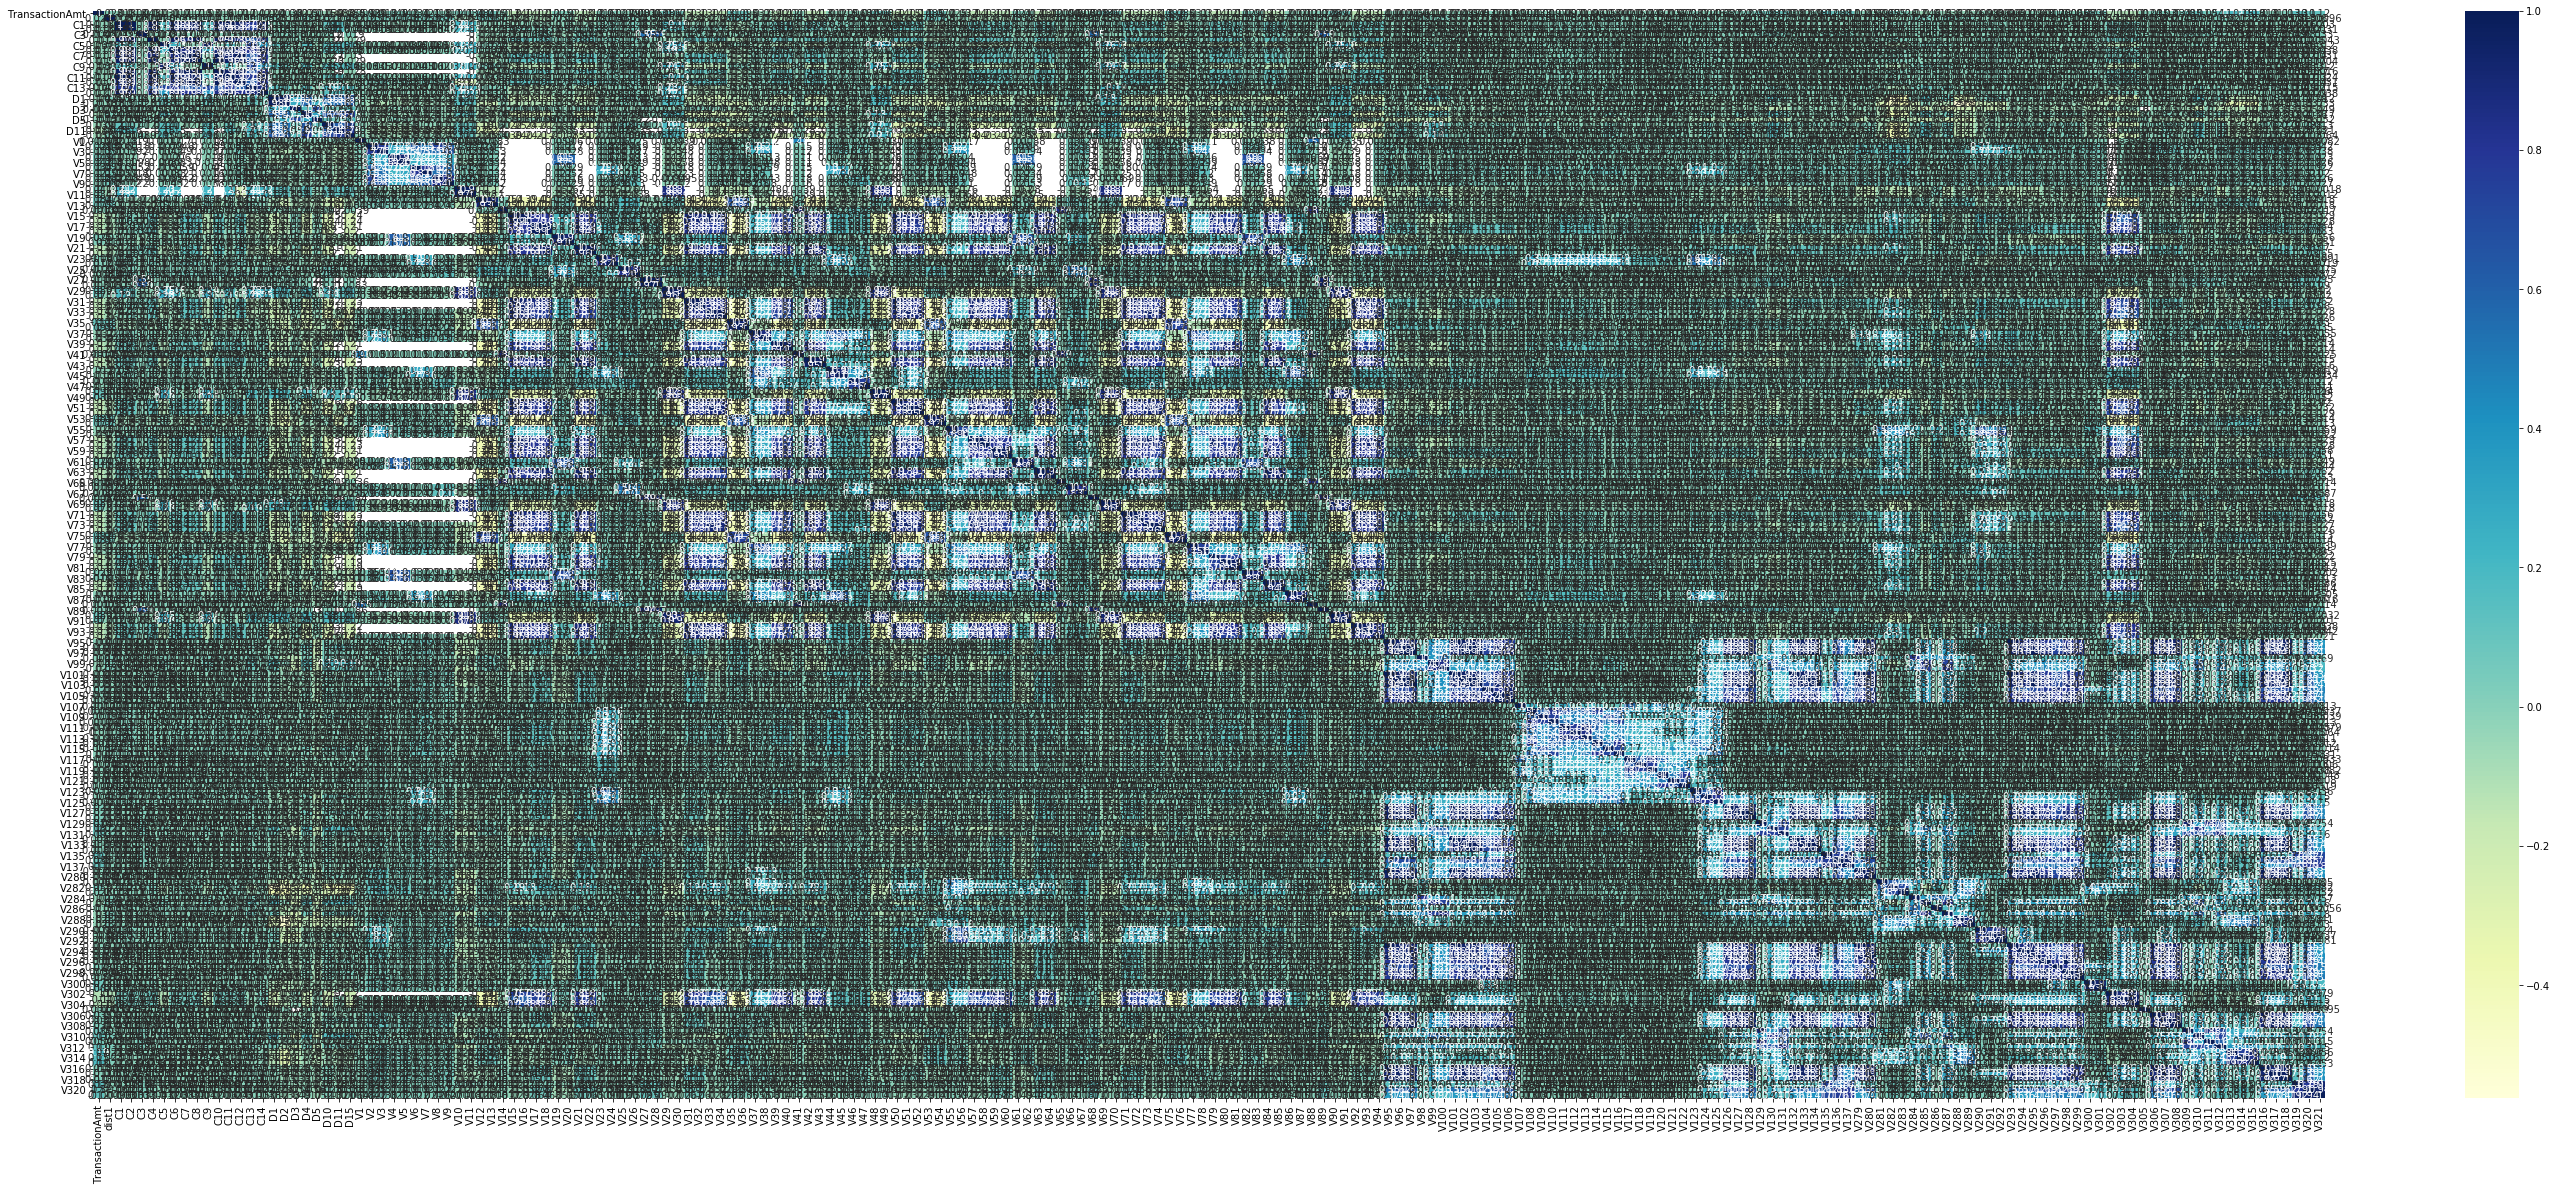

In [181]:
plt.figure(figsize=(50,20))
sn.heatmap(matrix,cmap='YlGnBu')

In [182]:
from tqdm import tqdm

In [183]:
##removing intersection cols
#ex::c1,c2,c3 c1&c2 having more correlation and c2&c3 are having more correlation
#but c1 and c3 are not not much correlated.
#If we remove just c2 we sloved problem of multicollinearty.
col1=set()
col2=set()
threshold=0.6
indexes=list(matrix.index)
cols=list(matrix.columns)
for i in tqdm(range(matrix.shape[0])):
    for j in range(matrix.shape[1]):
        if i>=j:
            continue
        else:
            if matrix.iloc[i,j]>=threshold:
                col1.add(indexes[i])
                col2.add(cols[j])
print(col1.intersection(col2))
                
intercols=list(col1.intersection(col2))

100%|██████████| 204/204 [00:00<00:00, 1090.86it/s]

{'V70', 'V57', 'V132', 'V302', 'V82', 'C7', 'V72', 'V93', 'V128', 'V285', 'V316', 'C6', 'V61', 'V314', 'V90', 'V63', 'V133', 'V31', 'V101', 'V19', 'V307', 'V279', 'V51', 'V68', 'V293', 'V105', 'V136', 'V29', 'V64', 'V8', 'V111', 'V16', 'V296', 'V131', 'D2', 'V137', 'V59', 'V130', 'C8', 'V112', 'V96', 'C11', 'V308', 'V319', 'V114', 'V39', 'V298', 'V17', 'V54', 'V294', 'V52', 'V62', 'V291', 'D11', 'V74', 'V71', 'V30', 'V32', 'V97', 'V297', 'V103', 'V38', 'V306', 'V134', 'V3', 'V60', 'V94', 'V109', 'V75', 'V41', 'V318', 'V123', 'V280', 'V22', 'V56', 'V81', 'V44', 'V28', 'V104', 'V320', 'V115', 'C13', 'V18', 'V21', 'C9', 'V45', 'V33', 'V58', 'V65', 'V100', 'V282', 'V35', 'V299', 'V317', 'V85', 'V92', 'V73', 'V86', 'V124', 'V126', 'C2', 'V310', 'V290', 'V69', 'V84', 'V309', 'V79', 'C12', 'V43', 'V102', 'C4', 'V110', 'V77', 'V36', 'V40', 'V20', 'V48', 'V6', 'V5', 'V106', 'V295', 'V34', 'V50', 'V118', 'V303', 'V127', 'D10', 'C10', 'V42', 'V53', 'V11', 'V49', 'V80', 'V13'}


In [184]:
df.drop(intercols,axis=1,inplace=True)
data.drop(intercols,axis=1,inplace=True)

In [185]:
#after removing intercols lets remove remaining ones if we have.
rem_cols=[]
matrix=data.corr()
indexes=list(matrix.index)
threshold=0.65
for i in tqdm(range(matrix.shape[0])):
    for j in range(matrix.shape[1]):
        if i>=j:
            continue
        else:
            if matrix.iloc[i,j]>=threshold:
                rem_cols.append(indexes[i])

100%|██████████| 70/70 [00:00<00:00, 3701.57it/s]


In [186]:
print(rem_cols)

['C1', 'D3', 'D4', 'V10', 'V12', 'V14', 'V15', 'V23', 'V25', 'V27', 'V46', 'V66', 'V98', 'V99', 'V117', 'V120', 'V121', 'V129', 'V129', 'V135', 'V288', 'V300', 'V313']


In [187]:
df.drop(rem_cols,axis=1,inplace=True)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 66 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TransactionID   590540 non-null  int64  
 1   isFraud         590540 non-null  int64  
 2   TransactionDT   590540 non-null  int64  
 3   TransactionAmt  590540 non-null  float64
 4   ProductCD       590540 non-null  object 
 5   card1           590540 non-null  int64  
 6   card2           590540 non-null  object 
 7   card3           590540 non-null  object 
 8   card4           590540 non-null  object 
 9   card5           590540 non-null  object 
 10  card6           590540 non-null  object 
 11  addr1           590540 non-null  object 
 12  addr2           590540 non-null  object 
 13  dist1           590540 non-null  float64
 14  P_emaildomain   590540 non-null  object 
 15  C3              590540 non-null  float64
 16  C5              590540 non-null  float64
 17  C14       

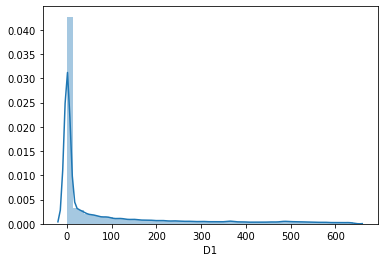

In [189]:
sn.distplot(df['D1'])

In [190]:
df['D1'].describe()

count    589271.000000
mean         94.347568
std         157.660387
min           0.000000
25%           0.000000
50%           3.000000
75%         122.000000
max         640.000000
Name: D1, dtype: float64

In [191]:
df['D1'].fillna(value=3,inplace=True)

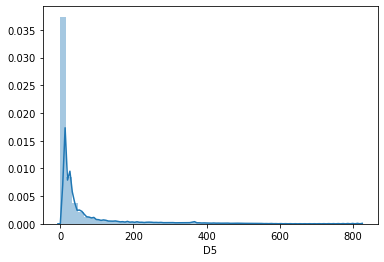

In [192]:
sn.distplot(df['D5'])

In [193]:
df['D5'].fillna(value=-1,inplace=True)

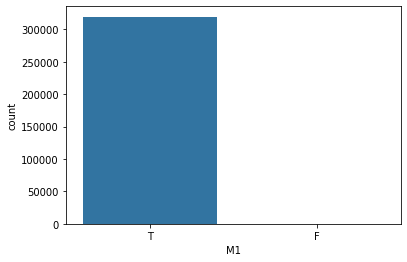

In [194]:
sn.countplot(df['M1'])

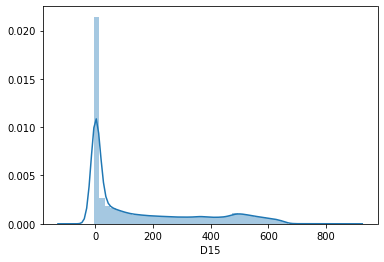

In [195]:
sn.distplot(df['D15'])

In [196]:
df['D15'].fillna(800,inplace=True)

In [197]:
df['M1'].fillna(value='torf',inplace=True)

In [198]:
df['M1']=df['M1'].apply(lambda x: str(x)+'M1')

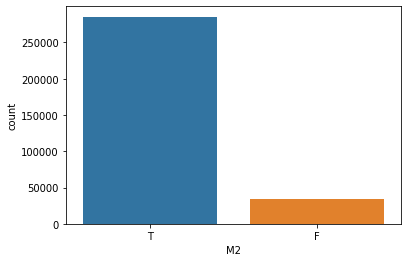

In [199]:
sn.countplot(df['M2'])

In [200]:
df['M2'].fillna(value='torf',inplace=True)
df['M2']=df['M2'].apply(lambda x: str(x)+'M2')

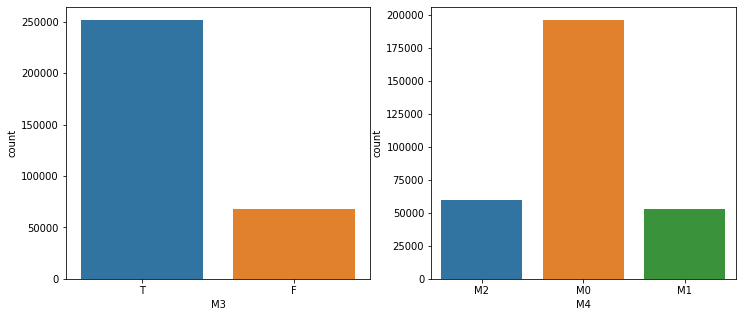

In [201]:
plt.subplots(1,2,figsize=(12,5))
plt.subplot(1,2,1)
sn.countplot(df['M3'])
plt.subplot(1,2,2)
sn.countplot(df['M4'])


In [202]:
df['M3'].fillna(value='torf',inplace=True)
df['M3']=df['M2'].apply(lambda x: str(x)+'M3')
df['M4'].fillna(value='other_m',inplace=True)
df['M4']=df['M4'].apply(lambda x: str(x)+'M4')

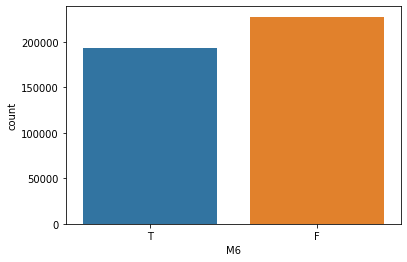

In [203]:
sn.countplot(df['M6'])

In [204]:
df['M6'].fillna(value='torf',inplace=True)
df['M6']=df['M6'].apply(lambda x: str(x)+'M6')

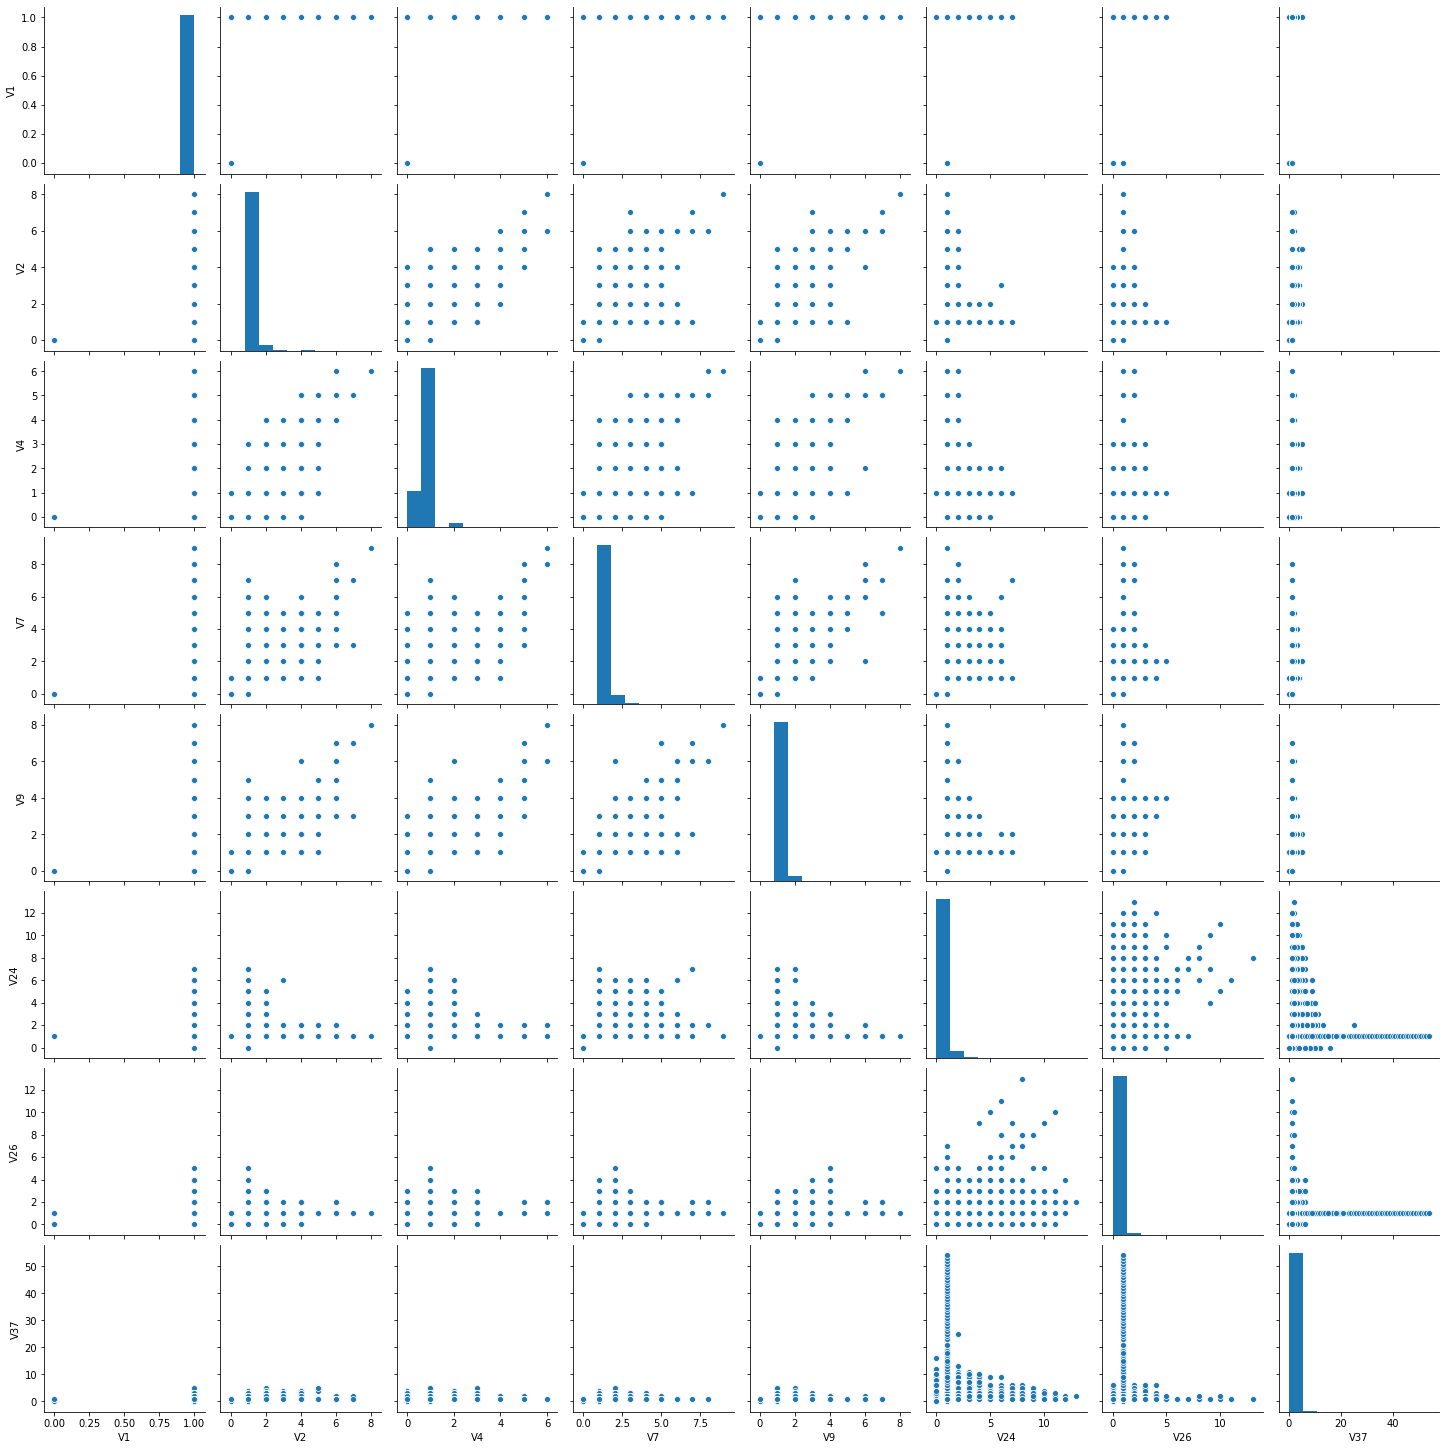

In [205]:

sn.pairplot(df[['V1'
                ,'V2'
                ,'V4'
                ,'V7'
                ,'V9'
                ,'V24'
                ,'V26'
                ,'V37']])

In [206]:
df['V1'].fillna(value=-1,inplace=True)
df['V2'].fillna(value=-1,inplace=True)
df['V4'].fillna(value=-1,inplace=True)
df['V7'].fillna(value=-1,inplace=True)
df['V9'].fillna(value=-1,inplace=True)
df['V24'].fillna(value=-1,inplace=True)
df['V26'].fillna(value=-1,inplace=True)
df['V37'].fillna(value=-1,inplace=True)

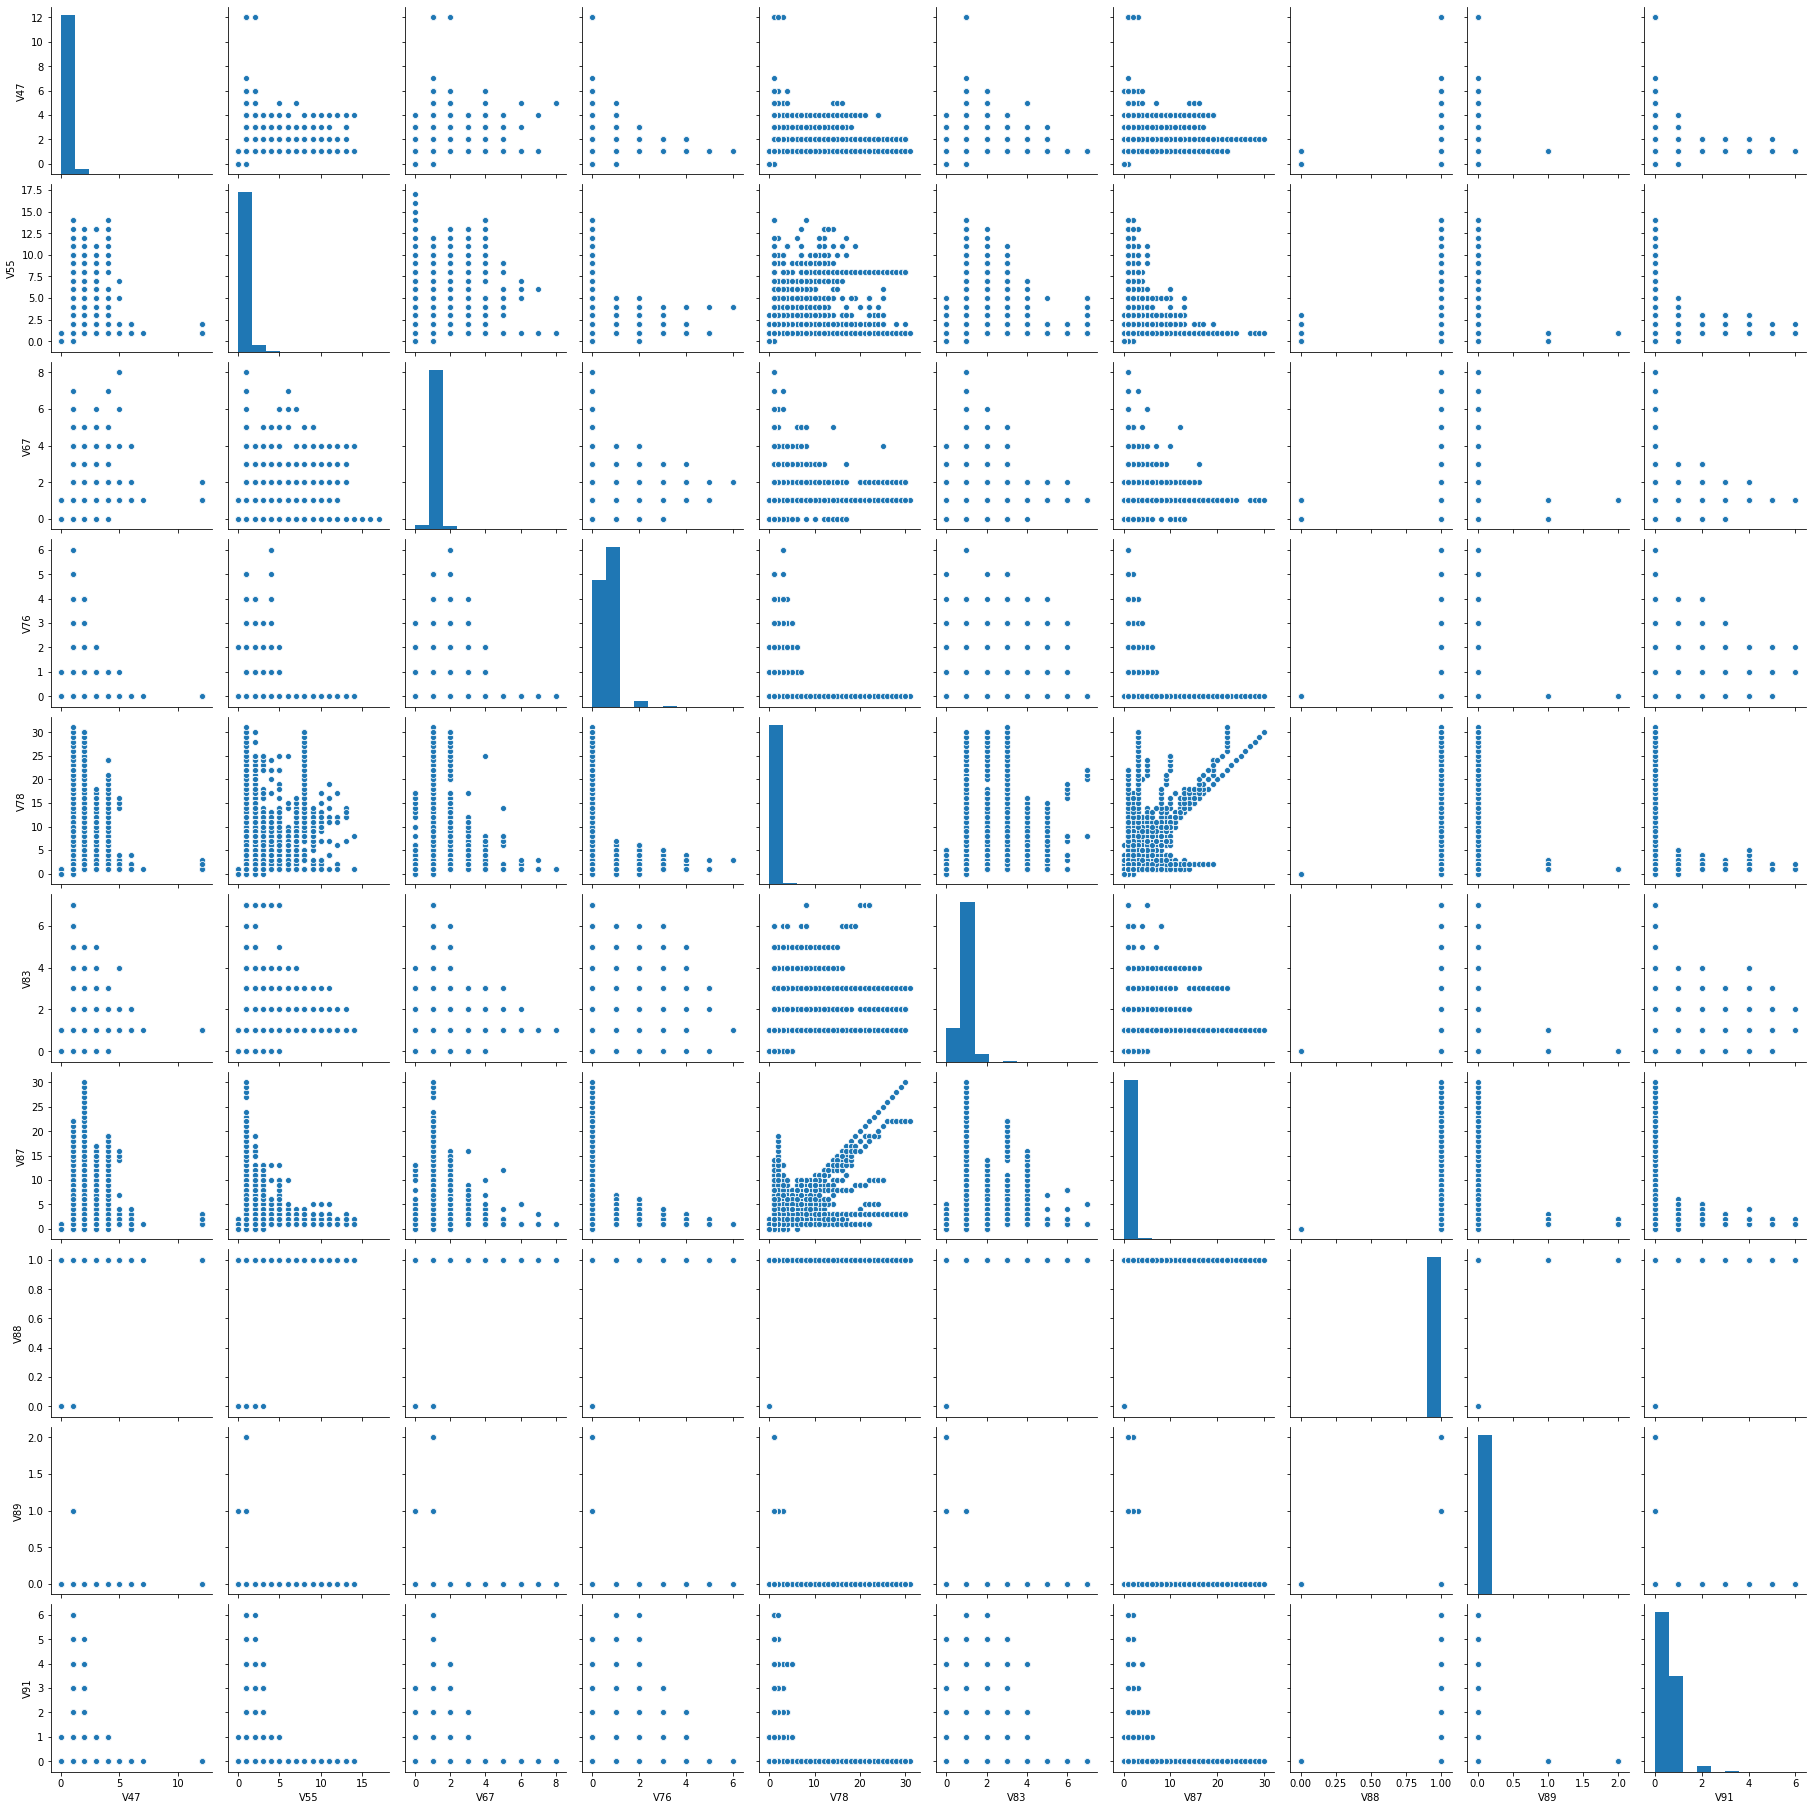

In [207]:
sn.pairplot(df[['V47'  
               ,'V55'  
               ,'V67'  
               ,'V76'  
               ,'V78'  
               ,'V83'  
               ,'V87'  
               ,'V88'  
               ,'V89'  
               ,'V91']])

In [208]:
df['V47'].fillna(value=-1,inplace=True)
df['V55'].fillna(value=-1,inplace=True)
df['V67'].fillna(value=-1,inplace=True)
df['V76'].fillna(value=-1,inplace=True)
df['V78'].fillna(value=-1,inplace=True)
df['V83'].fillna(value=-1,inplace=True)
df['V88'].fillna(value=-1,inplace=True)
df['V89'].fillna(value=-1,inplace=True)
df['V91'].fillna(value=-1,inplace=True)

In [209]:
df[['V95' 
    ,'V107'
    ,'V108'
    ,'V113'
    ,'V116'
    ,'V119'
    ,'V122'
    ,'V125'
    ,'V281'
    ,'V283'
    ]].describe()

V95           V107           V108           V113  \
count  590226.000000  590226.000000  590226.000000  590226.000000   
mean        1.038019       0.999580       1.004613       1.003383   
std        21.034304       0.020494       0.081146       0.074754   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       1.000000       1.000000   
50%         0.000000       1.000000       1.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max       880.000000       1.000000       7.000000       9.000000   

                V116           V119           V122           V125  \
count  590226.000000  590226.000000  590226.000000  590226.000000   
mean        1.015738       1.000729       1.001759       1.050415   
std         0.136770       0.036392       0.048636       0.280037   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max         6.000000       3.000000       3.000000      13.000000   

                V281           V283  
count  589271.000000  589271.000000  
mean        0.087783       0.991114  
std         0.512748       1.558731  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       1.000000  
75%         0.000000       1.000000  
max        22.000000      68.000000

In [210]:
df[['V284'
    ,'V286'
    ,'V287'
    ,'V289'
    ,'V292'
    ,'V301'
    ,'V304'
    ,'V305'
    ,'V311'
    ,'V312'
    ,'V315'
    ,'V321']].describe()

V284           V286           V287           V289  \
count  590528.000000  590528.000000  590528.000000  589271.000000   
mean        0.088543       0.031492       0.358579       0.235975   
std         0.338424       0.190939       1.078995       0.599231   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max        12.000000       8.000000      31.000000      12.000000   

                V292           V301           V304           V305  \
count  590528.000000  589271.000000  590528.000000  590528.000000   
mean        1.239916       0.052002       0.264208       1.000007   
std         3.775050       0.318310       0.528238       0.002603   
min         1.000000       0.000000       0.000000       1.000000   
25%         1.000000       0.000000       0.000000       1.000000   
50%         1.000000       0.000000       0.000000       1.000000   
75%         1.000000       0.000000       0.000000       1.000000   
max       323.000000      13.000000      16.000000       2.000000   

                V311           V312           V315           V321  
count  590528.000000  590528.000000  589271.000000  590528.000000  
mean        4.202175      39.173910      26.806977      28.326584  
std       102.374938     172.128339     116.853222     382.053171  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max     55125.000000   55125.000000    4817.470215  104060.000000

In [211]:
df['V95'].fillna(value=0,inplace=True)
df['V107'].fillna(value=1,inplace=True)
df['V108'].fillna(value=1,inplace=True)
df['V113'].fillna(value=1,inplace=True)
df['V116'].fillna(value=1,inplace=True)
df['V119'].fillna(value=1,inplace=True)
df['V122'].fillna(value=1,inplace=True)
df['V125'].fillna(value=1,inplace=True)
df['V281'].fillna(value=1,inplace=True)
df['V283'].fillna(value=1,inplace=True)
df['V284'].fillna(value=0,inplace=True)
df['V286'].fillna(value=0,inplace=True)
df['V287'].fillna(value=0,inplace=True)
df['V289'].fillna(value=0,inplace=True)
df['V292'].fillna(value=1,inplace=True)
df['V301'].fillna(value=0,inplace=True)
df['V304'].fillna(value=0,inplace=True)
df['V305'].fillna(value=1,inplace=True)
df['V311'].fillna(value=0,inplace=True)
df['V312'].fillna(value=0,inplace=True)
df['V315'].fillna(value=0,inplace=True)
df['V321'].fillna(value=0,inplace=True)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 66 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TransactionID   590540 non-null  int64  
 1   isFraud         590540 non-null  int64  
 2   TransactionDT   590540 non-null  int64  
 3   TransactionAmt  590540 non-null  float64
 4   ProductCD       590540 non-null  object 
 5   card1           590540 non-null  int64  
 6   card2           590540 non-null  object 
 7   card3           590540 non-null  object 
 8   card4           590540 non-null  object 
 9   card5           590540 non-null  object 
 10  card6           590540 non-null  object 
 11  addr1           590540 non-null  object 
 12  addr2           590540 non-null  object 
 13  dist1           590540 non-null  float64
 14  P_emaildomain   590540 non-null  object 
 15  C3              590540 non-null  float64
 16  C5              590540 non-null  float64
 17  C14       

In [214]:
df.to_csv('transcation.csv',index=False)